## Logistic Regression Exercises

In these exercises, we'll continue working with the ```titanic dataset``` and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named ```model``` within your ```classification-exercises``` repository. Add, commit, and push your work.

In [10]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [1]:
import acquire as ac
import prepare as pr

In [2]:
import evaluate as ev

In [3]:
df = ac.get_titanic_data()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [86]:
train, validate, test, y_tr, y_val, y_tst = pr.full_split(df, 'survived')

In [87]:
train, validate, test = pr.impute_age(train, validate, test)
train, validate, test = pr.impute_embark_town(train, validate, test)

In [88]:
dummy_df_train = pd.get_dummies(train[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=True)
train = pd.concat([train, dummy_df_train], axis=1)

In [89]:
dummy_df_validate = pd.get_dummies(validate[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=True)
validate = pd.concat([validate, dummy_df_validate], axis=1)

In [114]:
dummy_df_test = pd.get_dummies(test[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=True)
test = pd.concat([test, dummy_df_test], axis=1)

In [90]:
train.drop(columns = ['passenger_id', 'deck', 'embarked'], inplace=True)

In [91]:
validate.drop(columns = ['passenger_id', 'deck', 'embarked'], inplace=True)

In [115]:
test.drop(columns = ['passenger_id', 'deck', 'embarked'], inplace=True)

In [55]:
train.head(1)

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
28,3,female,29.77193,0,0,7.8792,Third,Queenstown,1,0,0,1,1,0


In [92]:
validate.head(1)

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
599,1,male,49.0,1,0,56.9292,First,Cherbourg,0,1,0,0,0,0


1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [7]:
baseline_score = y_tr.value_counts(normalize=True).max()

In [122]:
(y_tr == 0).mean(), baseline_score

(0.6164658634538153, 0.6164658634538153)

In [39]:
train1 = train.loc[:, ['age', 'fare', 'pclass']]

In [56]:
logit1 = LogisticRegression()
logit1.fit(train1, y_tr)
y_pred1 = logit1.predict(train1)
cm1 = confusion_matrix(y_tr, y_pred1)

In [57]:
ev.count_scores(cm1, 'Logistic Regression - 1')

,Score Name,Logistic Regression - 1
0,Accuracy,0.62
1,True Positive Rate /Recall,0.05
2,False Positive Rate,0.03
3,True Negative Rate,0.97
4,False Negative Rate,0.95
5,Precision,0.53
6,F1 Score,0.09
7,Support Positive,191.00
8,Support Negative,307.00


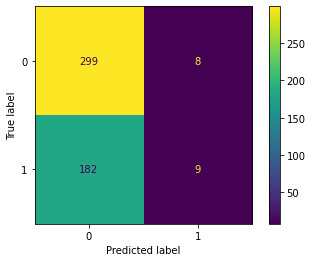

In [58]:
ev.display_cm(cm1)

In [60]:
score1 = logit1.score(train1, y_tr)

In [63]:
#is it better than baseline?
score1, baseline_score #almost the same

(0.6184738955823293, 0.6164658634538153)

In [62]:
score1

0.6184738955823293

2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [64]:
train2 = train.loc[:, ['age', 'fare', 'pclass', 'sex_male']]

In [65]:
train2.head(1)

,age,fare,pclass,sex_male
28,29.77193,7.8792,3,0


,Score Name,Logistic Regression - 2
0,Accuracy,0.81
1,True Positive Rate /Recall,0.73
2,False Positive Rate,0.14
3,True Negative Rate,0.86
4,False Negative Rate,0.27
5,Precision,0.77
6,F1 Score,0.75
7,Support Positive,191.00
8,Support Negative,307.00


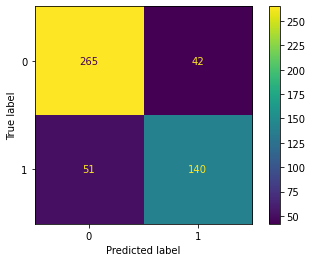

In [66]:
logit2 = LogisticRegression()
logit2.fit(train2, y_tr)
y_pred2 = logit2.predict(train2)
cm2 = confusion_matrix(y_tr, y_pred2)
display(ev.count_scores(cm2, 'Logistic Regression - 2'))
ev.display_cm(cm2)

3. Try out other combinations of features and models.

In [67]:
train.head(1)

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
28,3,female,29.77193,0,0,7.8792,Third,Queenstown,1,0,0,1,1,0


In [98]:
col3 = ['pclass', 'age', 'fare', 'sex_male', 'embark_town_Southampton']
train3 = train.loc[:, col3]

,Score Name,Logistic Regression - 3
0,Accuracy,0.81
1,True Positive Rate /Recall,0.74
2,False Positive Rate,0.15
3,True Negative Rate,0.85
4,False Negative Rate,0.26
5,Precision,0.76
6,F1 Score,0.75
7,Support Positive,191.00
8,Support Negative,307.00


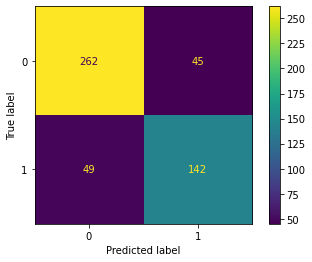

In [69]:
logit3 = LogisticRegression()
logit3.fit(train3, y_tr)
y_pred3 = logit3.predict(train3)
cm3 = confusion_matrix(y_tr, y_pred3)
display(ev.count_scores(cm3, 'Logistic Regression - 3'))
ev.display_cm(cm3)

In [99]:
col4 = ['pclass', 'age', 'fare', 'sex_male', 'embark_town_Southampton', 'class_Third']
train4 = train.loc[:, col4]

,Score Name,Logistic Regression - 4
0,Accuracy,0.82
1,True Positive Rate /Recall,0.72
2,False Positive Rate,0.11
3,True Negative Rate,0.89
4,False Negative Rate,0.28
5,Precision,0.80
6,F1 Score,0.76
7,Support Positive,191.00
8,Support Negative,307.00


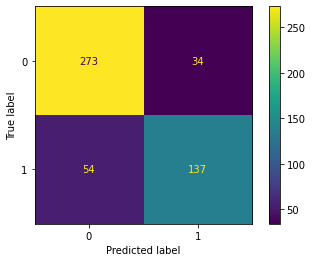

In [78]:
logit4 = LogisticRegression()
logit4.fit(train4, y_tr)
y_pred4 = logit4.predict(train4)
cm4 = confusion_matrix(y_tr, y_pred4)
display(ev.count_scores(cm4, 'Logistic Regression - 4'))
ev.display_cm(cm4)

In [72]:
train.head(1)

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
28,3,female,29.77193,0,0,7.8792,Third,Queenstown,1,0,0,1,1,0


In [111]:
col5 = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 
                  'embark_town_Queenstown', 'embark_town_Southampton', 
                  'class_Second', 'class_Third']

train5 = train.loc[:, col5]

,Score Name,Logistic Regression - 5
0,Accuracy,0.83
1,True Positive Rate /Recall,0.72
2,False Positive Rate,0.10
3,True Negative Rate,0.90
4,False Negative Rate,0.28
5,Precision,0.82
6,F1 Score,0.77
7,Support Positive,191.00
8,Support Negative,307.00


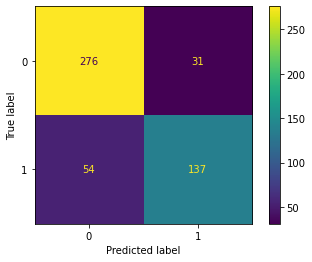

In [75]:
logit5 = LogisticRegression()
logit5.fit(train5, y_tr)
y_pred5 = logit5.predict(train5)
cm5 = confusion_matrix(y_tr, y_pred5)
display(ev.count_scores(cm5, 'Logistic Regression - 5'))
ev.display_cm(cm5)

4. Use you best 3 models to predict and evaluate on your validate sample.

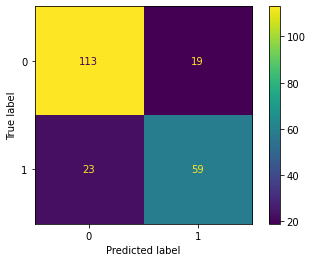

In [106]:
#best onee logit5, logit4, logit3

###logit3
y_pv3 = logit3.predict(validate.loc[:, col3])
cm3v =confusion_matrix(y_val, y_pv3)
validation_scores = ev.count_scores(cm3v, 'Logit3')
ev.display_cm(cm3v)

In [107]:
validation_scores

,Score Name,Logit3
0,Accuracy,0.80
1,True Positive Rate /Recall,0.72
2,False Positive Rate,0.14
3,True Negative Rate,0.86
4,False Negative Rate,0.28
5,Precision,0.76
6,F1 Score,0.74
7,Support Positive,82.00
8,Support Negative,132.00


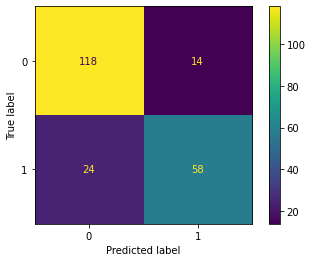

In [116]:
###logit4
y_pv4 = logit4.predict(validate.loc[:, col4])
cm4v =confusion_matrix(y_val, y_pv4)
ev.display_cm(cm4v)
validation_scores['Logit4'] = ev.count_scores(cm4v, 'Logistic Regression - 4').iloc[:,1]

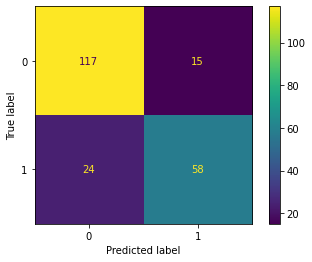

In [112]:
###logit4
y_pv5 = logit5.predict(validate.loc[:, col5])
cm5v =confusion_matrix(y_val, y_pv5)
ev.display_cm(cm5v)
validation_scores['Logit5'] = ev.count_scores(cm5v, 'Logit5').iloc[:,1]

In [117]:
validation_scores

,Score Name,Logit3,Logit4,Logit5
0,Accuracy,0.80,0.82,0.82
1,True Positive Rate /Recall,0.72,0.71,0.71
2,False Positive Rate,0.14,0.11,0.11
3,True Negative Rate,0.86,0.89,0.89
4,False Negative Rate,0.28,0.29,0.29
5,Precision,0.76,0.81,0.79
6,F1 Score,0.74,0.76,0.75
7,Support Positive,82.00,82.00,82.00
8,Support Negative,132.00,132.00,132.00


5. Choose your best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

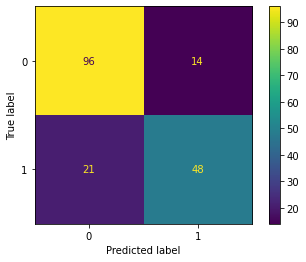

In [118]:
y_pt4 = logit4.predict(test.loc[:, col4])
cm4t =confusion_matrix(y_tst, y_pt4)
ev.display_cm(cm4t)
validation_scores['Test-Logit4'] = ev.count_scores(cm4t, 'Logit4-Test').iloc[:,1]

In [119]:
validation_scores

,Score Name,Logit3,Logit4,Logit5,Test-Logit4
0,Accuracy,0.80,0.82,0.82,0.80
1,True Positive Rate /Recall,0.72,0.71,0.71,0.70
2,False Positive Rate,0.14,0.11,0.11,0.13
3,True Negative Rate,0.86,0.89,0.89,0.87
4,False Negative Rate,0.28,0.29,0.29,0.30
5,Precision,0.76,0.81,0.79,0.77
6,F1 Score,0.74,0.76,0.75,0.73
7,Support Positive,82.00,82.00,82.00,69.00
8,Support Negative,132.00,132.00,132.00,110.00


**Bonus1:** How do different strategies for handling the missing values in the age column affect model performance?

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
564,3,female,30.190659,0,0,8.05,Third,Southampton,1,0,0,1,0,1


**Bonus2:** How do different strategies for encoding sex affect model performance?

**Bonus3:** scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
$C = 0.01, 01, 1, 10, 100, 1000$

**Bonus Bonus:** how does scaling the data interact with your choice of C?